# Analisando pistache

## Desafio 1

Nesse desafio vamos trabalhar com dados voltados para a classificação de tipos de pistache. Nessa primeira etapa do desafio quero que você visualize as primeiras linhas do dataset, verifique a presença de dados nulos e mapeie a classe Kirmizi_Pistachio para o valor 0 e a Siit_Pistachio para o valor 1.

Depois disso realize uma análise exploratória dos dados para identificar features que sejam importantes para o processo de classificação. Você pode gerar boxplots para comparar diferentes features e também gerar uma matriz de correlação para verificar a correlação das features entre si e entre a coluna da classe de pistache. Para isso, separe os dados em treino e teste e construa esses gráficos com base nos dados de treino.

Por fim, treine um modelo do tipo RandomForestClassifier e visualize as 10 features mais importantes obtidas a partir do modelo.

In [1]:
import pandas as pd

df = pd.read_csv('./pistachio.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [2]:
df.isnull().sum().sum()

0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [4]:
df['Class'].unique()

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

In [5]:
df['Class'].value_counts(normalize=True)

Kirmizi_Pistachio    0.580908
Siit_Pistachio       0.419092
Name: Class, dtype: float64

A base não apresenta valores nulos. Todas as colunas são numéricas, com exceção da variável alvo, que possui dois valores categóricos: 'Kirmizi_Pistachio' e 'Siit_Pistachio'. Há um certo desbalanceamento favorecendo a classe Kirmizi_Pistachio (58% dos dados).

Aplicando Label Encoding na variável alvo:

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc = pd.Series(y_enc, name='Class')
y_enc

0       0
1       1
2       0
3       0
4       0
       ..
1713    0
1714    0
1715    1
1716    0
1717    1
Name: Class, Length: 1718, dtype: int32

In [8]:
le.classes_

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

In [9]:
print(f'Classe Kirmizi_Pistachio foi codificada para {le.transform(["Kirmizi_Pistachio"])[0]}')
print(f'Classe Siit_Pistachio foi codificada para {le.transform(["Siit_Pistachio"])[0]}')

Classe Kirmizi_Pistachio foi codificada para 0
Classe Siit_Pistachio foi codificada para 1


Separando os dados para treino e teste:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=.33, stratify=y, random_state=5)

### Análise exploratória

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# show a boxplot and a violinplot side by side for the given feature
def show_plots(feature):    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(X_train, x=y_train, y=feature, ax=ax1)
    sns.violinplot(X_train, x=y_train, y=feature, ax=ax2)
    fig.suptitle(f"Boxplot and Violinplot for {feature}")
    plt.tight_layout()
    plt.show();

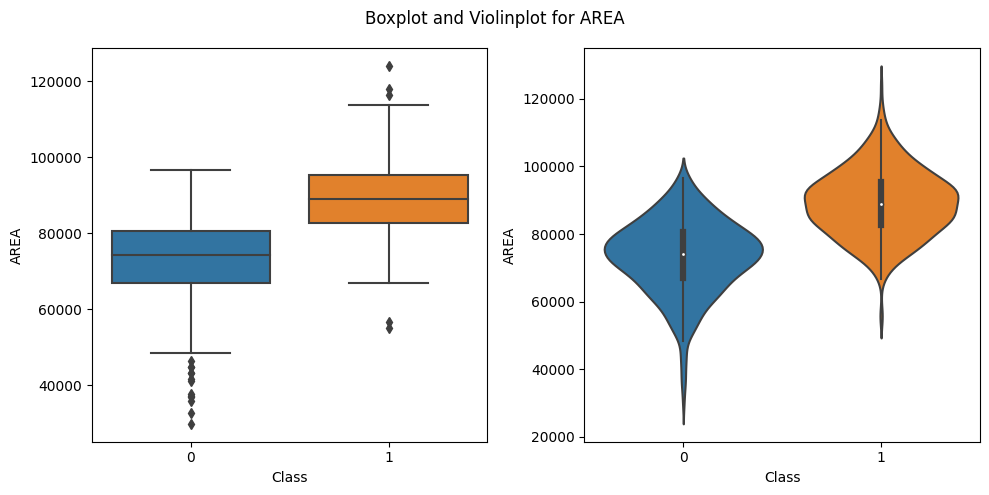

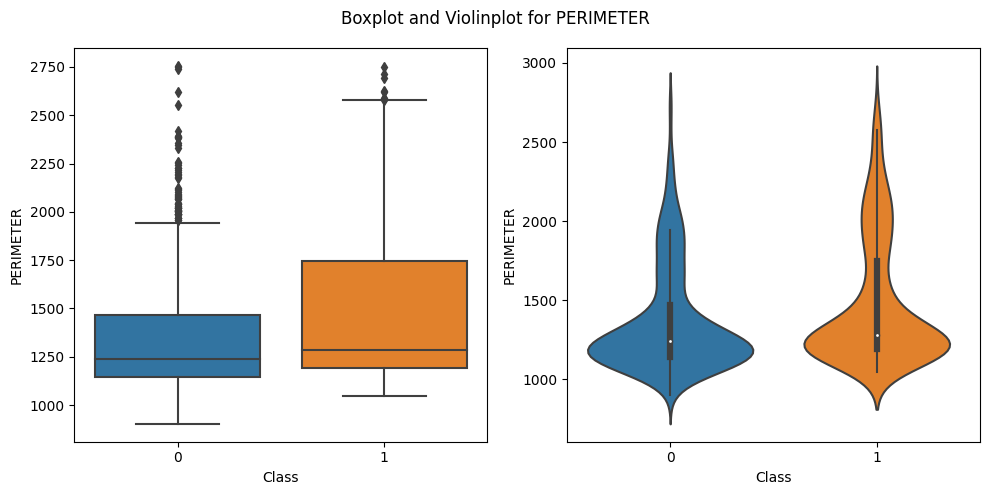

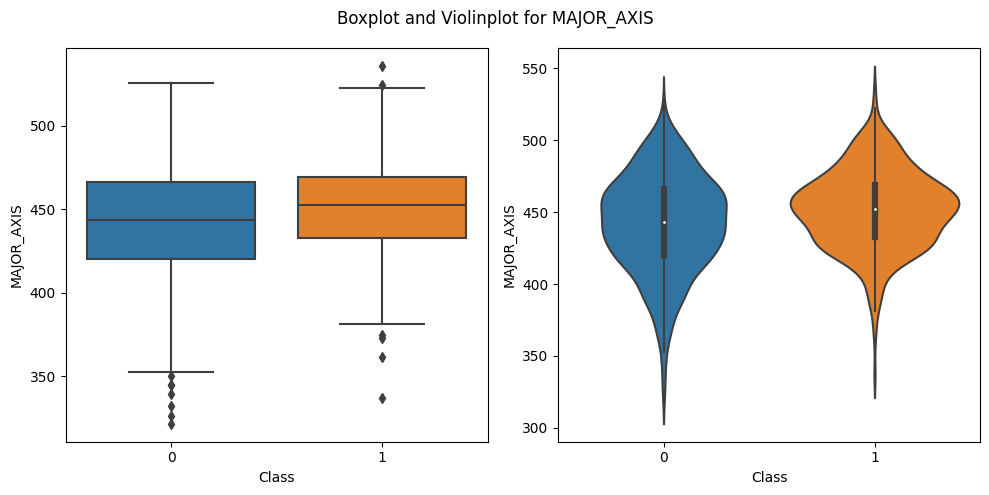

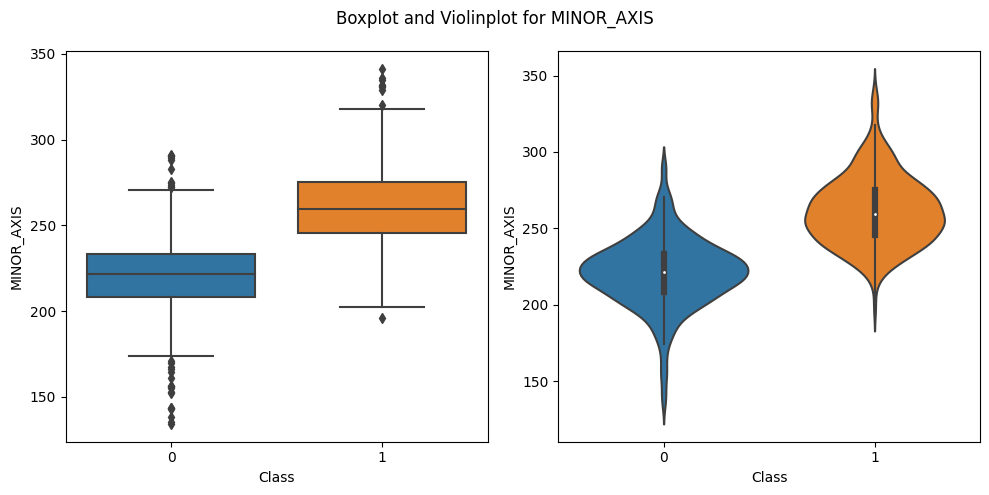

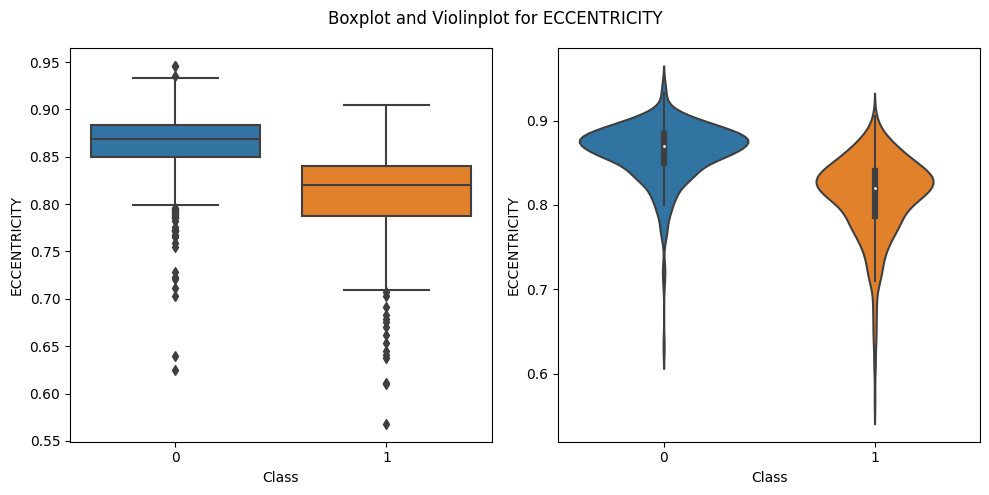

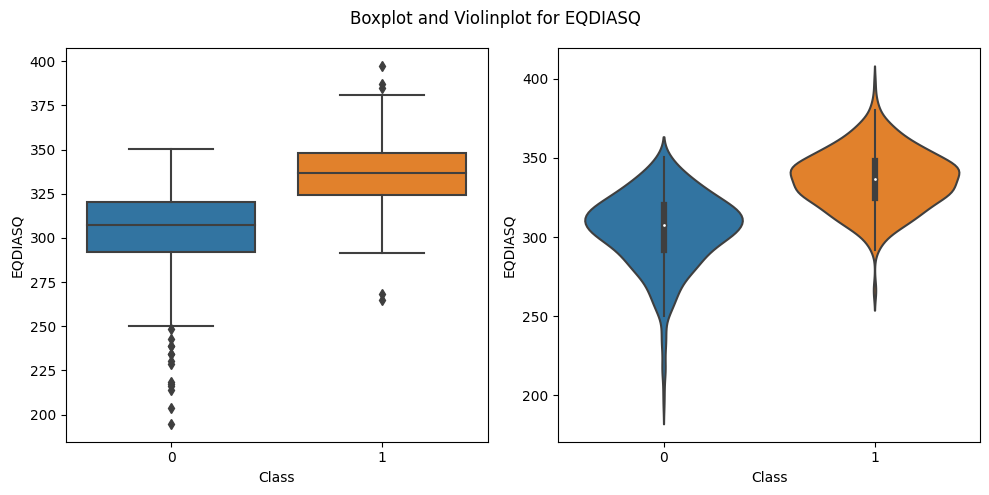

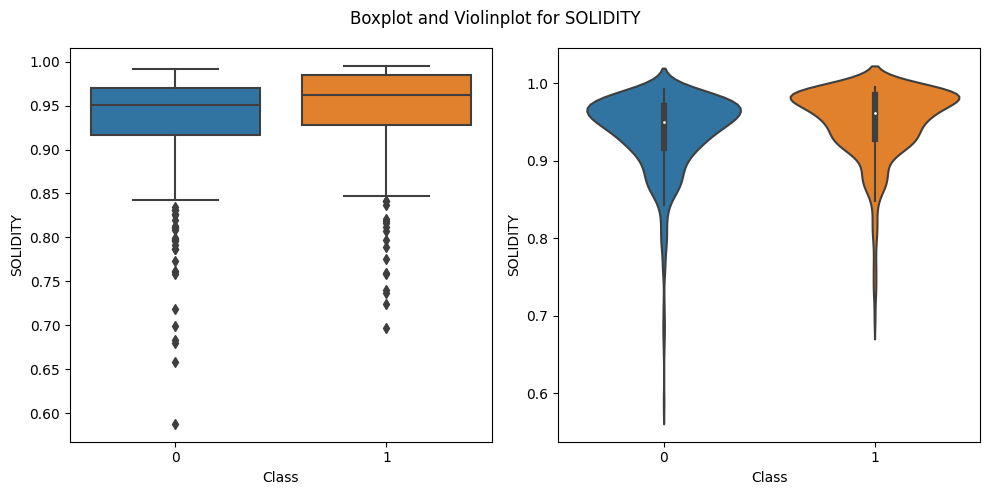

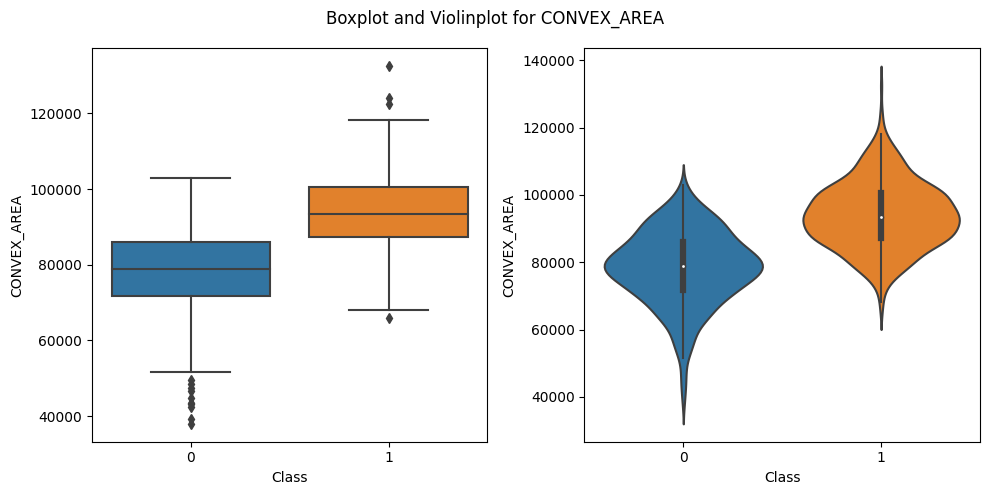

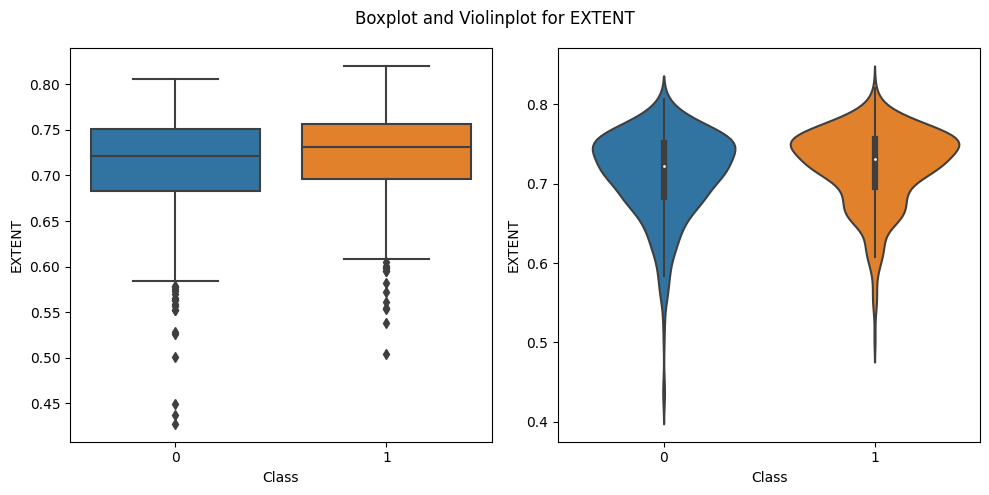

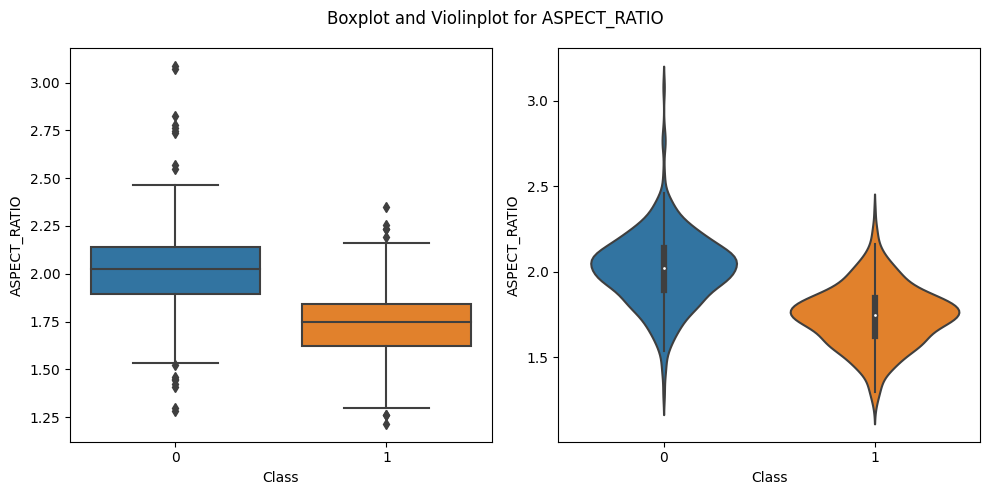

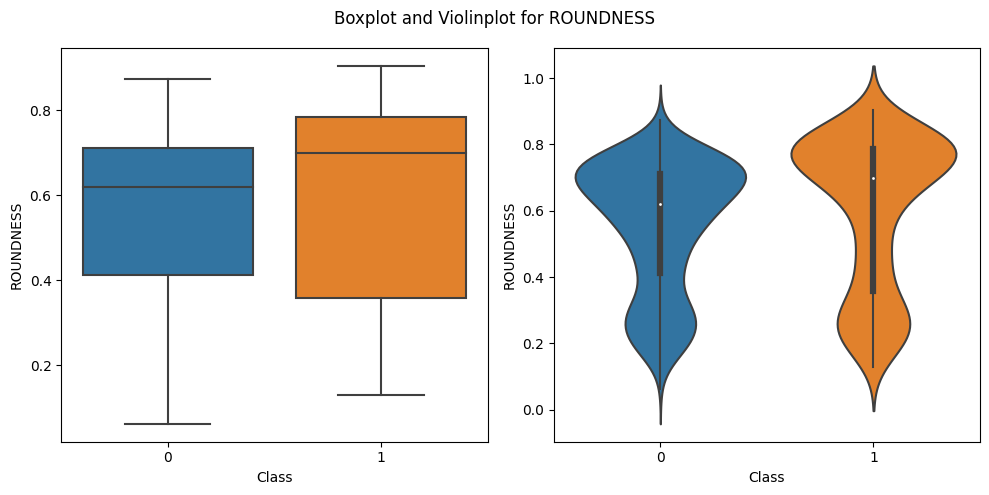

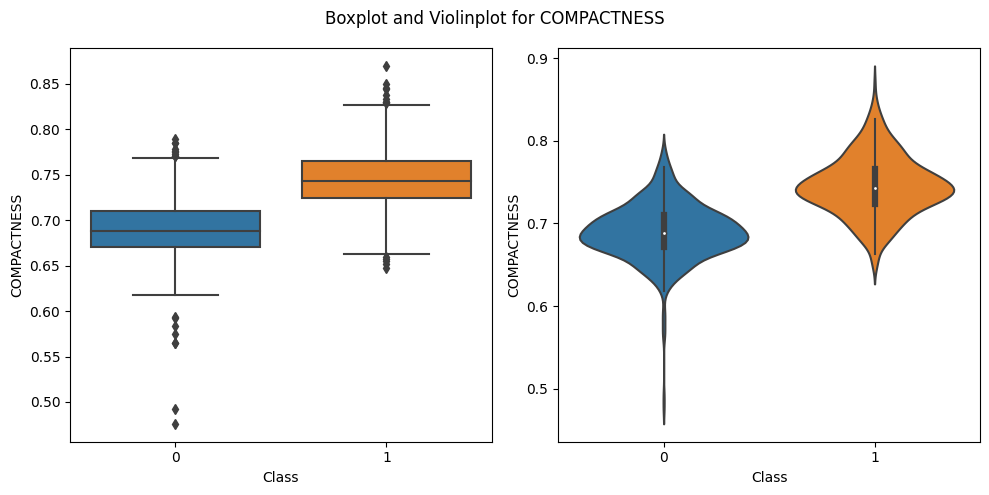

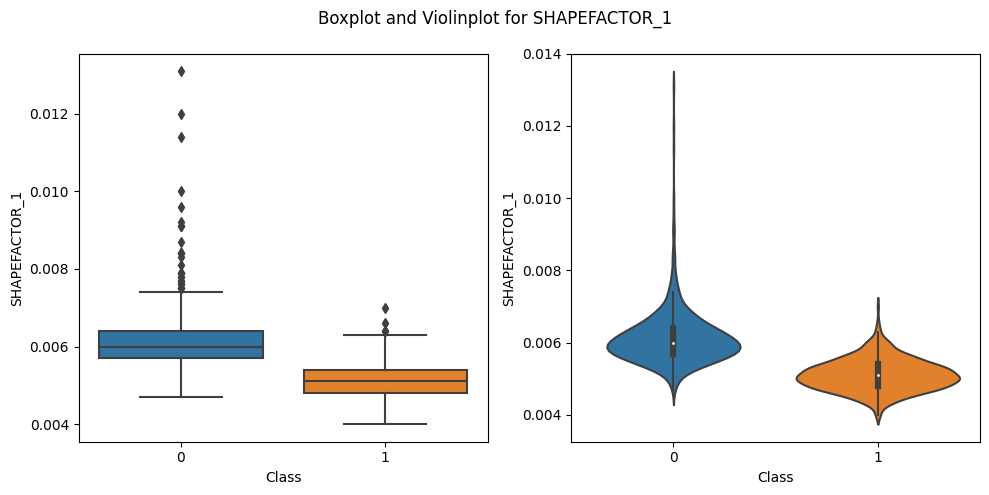

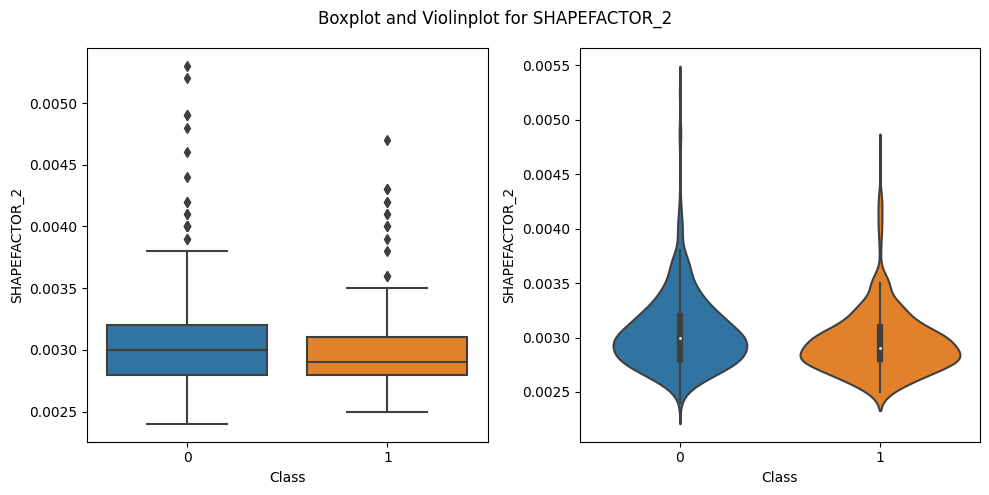

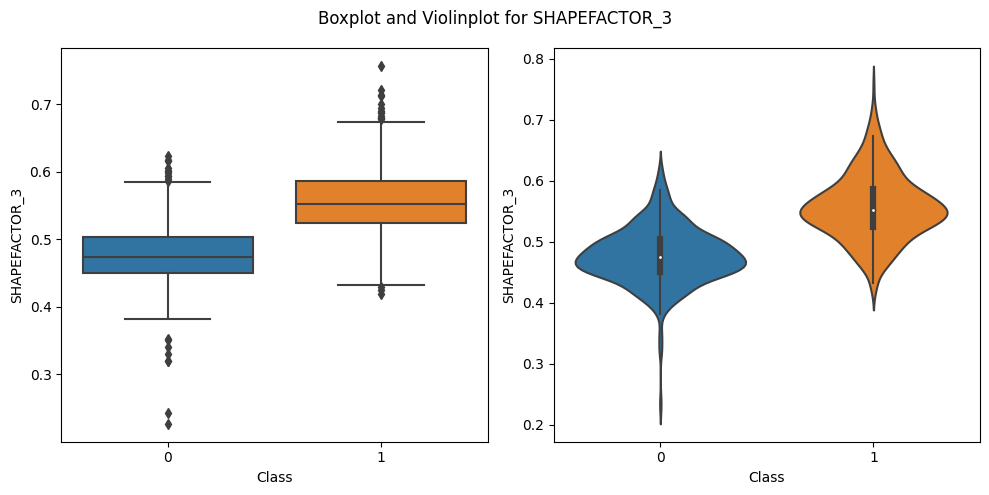

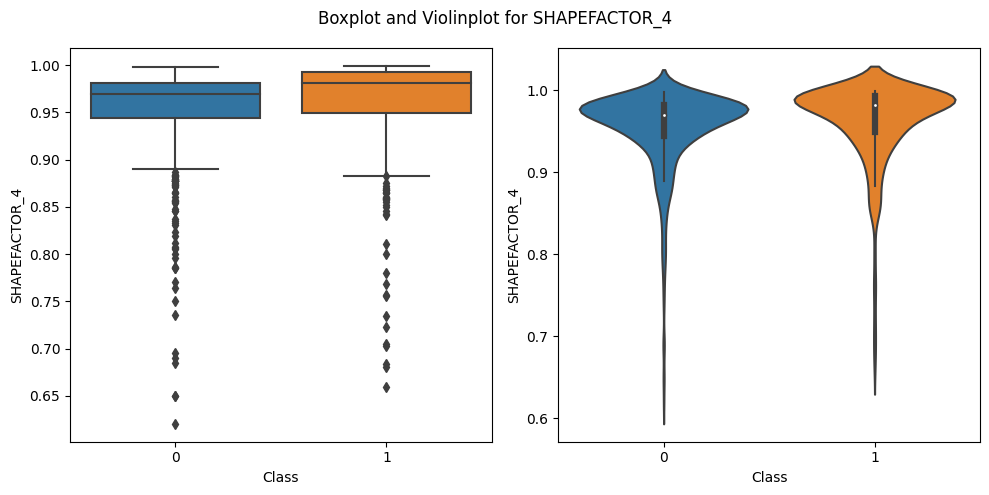

In [12]:
for col in X_train.columns:
    show_plots(col)

Pelos gráficos, vemos maior variabilidade e diferenças nas features: AREA, MINOR_AXIS, ECCENTRICITY, EQDIASQ, CONVEX_AREA, ASPECT_RATIO, COMPACTNESS, SHAPEFACTOR_1 e SHAPEFACTOR_3.

Vamos analisar a correlação entre todas as features utilizando um heatmap:

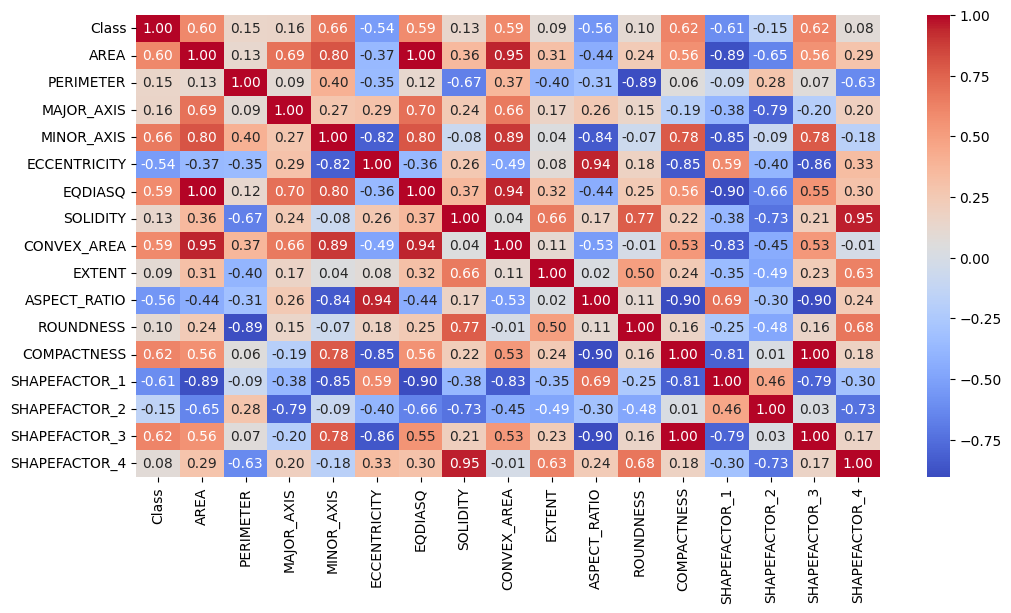

In [13]:
corr = pd.concat([y_train, X_train], axis=1).corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f');

Pelo heatmap, observamos que há correlação entre a variável alvo e algumas features, mas nada muito forte. 

Há, no entanto, presença de algumas correlações bem fortes entre features, como é o caso de: 
- COMPACTNESS e SHAPEFACTOR_3 (1),

- AREA e EQDIASQ (1),

- SOLIDITY e SHAPEFACTOR_4 (0.95),

- AREA e CONVEX_AREA (0.95),

- ECCENTRICITY e ASPECT_RATIO (0.94),

- EQDIASQ e CONVEX_AREA (0.94),

- ASPECT_RATIO e COMPACTNESS (-0.90),

- ASPECT_RATIO e SHAPEFACTOR_3 (-0.90),

- EQDIASQ e SHAPEFACTOR_1 (-0.90)


### Análise das features com o modelo

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [15]:
top10_features = pd.DataFrame({
    'columns': X_train.columns, 
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)
top10_features

,columns,importance
12,SHAPEFACTOR_1,0.164516
3,MINOR_AXIS,0.145300
14,SHAPEFACTOR_3,0.121775
11,COMPACTNESS,0.079103
0,AREA,0.068760
9,ASPECT_RATIO,0.060518
5,EQDIASQ,0.058368
15,SHAPEFACTOR_4,0.057373
4,ECCENTRICITY,0.047576
7,CONVEX_AREA,0.045180


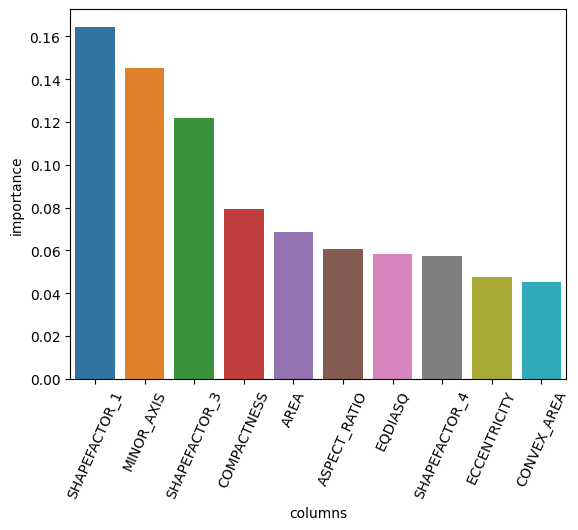

In [16]:
ax = sns.barplot(top10_features, x='columns', y='importance')
# rotating tick labels for X axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=66);

Podemos ver que todas as nove features que identificamos na análise visual também aparecem nas melhores features do modelo treinado: AREA, MINOR_AXIS, ECCENTRICITY, EQDIASQ, CONVEX_AREA, ASPECT_RATIO, COMPACTNESS, SHAPEFACTOR_1 e SHAPEFACTOR_3.

## Desafio 2

Continuando o desafio proposto na Aula 2, agora você deve aproveitar o modelo criado com a RandomForest e selecionar as melhores features. Com as features selecionadas, treine um novo modelo e estime o score sobre os dados de teste. Use o GridSearchCV para uma escolha mais robusta dos parâmetros do modelo.

### Selecionando melhores features para o modelo padrão

Vamos selecionar as 10 melhores features para o modelo padrão criado e treinado anteriormente.

In [17]:
from sklearn.feature_selection import SelectFromModel

selected_features = SelectFromModel(model, prefit=True, max_features=10)
X_train_featselected = selected_features.transform(X_train)
X_test_featselected = selected_features.transform(X_test)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Vamos treinar um novo modelo, com valores padrão de hiperparâmetros, mas agora somente com as features selecionadas.

In [18]:
model_featselected = RandomForestClassifier(random_state=5)
model_featselected.fit(X_train_featselected, y_train)

RandomForestClassifier(random_state=5)

In [19]:
print(f'Acurácia com todas as features: {model.score(X_test, y_test)}')
print(f'Acurácia com as features selecionadas: {model_featselected.score(X_test_featselected, y_test)}')

Acurácia com todas as features: 0.8871252204585538
Acurácia com as features selecionadas: 0.8483245149911817


### Modelo com grid search e melhores features

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=5), 
    param_grid,
    scoring='accuracy',
    cv=5
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [21]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [22]:
model_bestparams = grid_search.best_estimator_
selected_features = SelectFromModel(model_bestparams, prefit=True, max_features=10)
X_train_featselected = selected_features.transform(X_train)
X_test_featselected = selected_features.transform(X_test)
model_bestparams.fit(X_train_featselected, y_train)
print(f'Acurácia com features selecionadas e melhores hiperparâmetros: {model_bestparams.score(X_test_featselected, y_test)}')

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Acurácia com features selecionadas e melhores hiperparâmetros: 0.8571428571428571


c:\codes\ML-classificacao-Alura\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


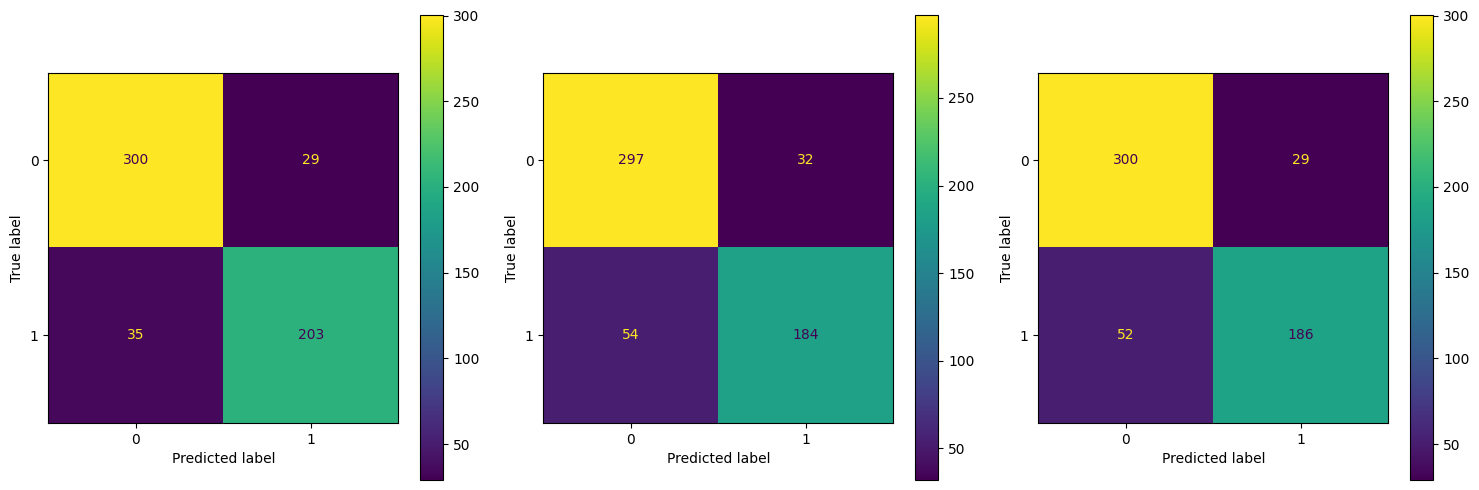

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

selected_features = SelectFromModel(model, prefit=True, max_features=10)
X_test_featselected_model = selected_features.transform(X_test)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), ax=ax1)
ConfusionMatrixDisplay.from_predictions(y_test, model_featselected.predict(X_test_featselected_model), ax=ax2)
ConfusionMatrixDisplay.from_predictions(y_test, model_bestparams.predict(X_test_featselected), ax=ax3)
plt.tight_layout()
plt.show();

### Resultados

**Modelo 1** - Acurácia com todas as features: 0.8871252204585538

**Modelo 2** - Acurácia com as features selecionadas: 0.8483245149911817

**Modelo 3** - Acurácia com features selecionadas e melhores hiperparâmetros: 0.8571428571428571

Em termos de acurácia, Modelo 1 apresentou o melhor resultado, seguido do Modelo 3 e, por fim, o Modelo 2. A diferença entre eles, no entanto, foi baixa. 

Em termos de tempo de execução, o fit do Modelo 1 foi maior (0.8s), enquanto dos Modelos 2 e 3 foi igual a 0.3s (sem levar em conta o tempo de 2m22s para o fit do grid search).

## Desafio 3

Continuando com o desafio da aula passada tente realizar a seleção de features em conjunto com a validação cruzada. Ao final do processo, obtenha o número ideal de features e o ranking das features. Também construa uma matriz de confusão para mostrar a performance do modelo treinado sobre os dados de teste.

--

Vou utilizar o modelo de Random Forest com os parâmetros otimizados que o grid search encontrou anteriormente. Este modelo será passado para o RFECV para a seleção das features em conjunto com a validação cruzada (usando o stratified K-fold).

In [25]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [29]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

base_model = RandomForestClassifier(**grid_search.best_params_, random_state=5)

cv = StratifiedKFold(shuffle=True, random_state=5)

model_rfecv = RFECV(
    estimator=base_model,
    cv=cv,
    scoring='accuracy'
)

In [30]:
model_rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
      estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, random_state=5),
      scoring='accuracy')

In [35]:
print(f'Número ideal de features (RFECV): {model_rfecv.n_features_}')
print(f'Features selecionadas: {model_rfecv.get_feature_names_out()}')

Número ideal de features (RFECV): 14
Features selecionadas: ['AREA' 'PERIMETER' 'MAJOR_AXIS' 'MINOR_AXIS' 'ECCENTRICITY' 'EQDIASQ'
 'CONVEX_AREA' 'EXTENT' 'ASPECT_RATIO' 'ROUNDNESS' 'COMPACTNESS'
 'SHAPEFACTOR_1' 'SHAPEFACTOR_3' 'SHAPEFACTOR_4']


A base de dados possui 16 colunas. Dessas, somente duas foram eliminadas pelo RFECV: SOLIDITY e SHAPEFACTOR_2. Ambas haviam sido identificadas durante a análise exploratória com o box plot e o violin plot, e SOLIDITY também havia aparecido na análise das correlações.

In [40]:
print(f'Ranking das features:')
pd.DataFrame({
    'feature': X_train.columns,
    'rank': model_rfecv.ranking_
}).sort_values(by='rank')

Ranking das features:


,feature,rank
0,AREA,1
1,PERIMETER,1
2,MAJOR_AXIS,1
3,MINOR_AXIS,1
4,ECCENTRICITY,1
5,EQDIASQ,1
7,CONVEX_AREA,1
8,EXTENT,1
9,ASPECT_RATIO,1
10,ROUNDNESS,1


In [52]:
avg_acc = model_rfecv.cv_results_['mean_test_score']
print('Média do accuracy por quantidade de features:')
pd.DataFrame({
    '# features': range(1, len(avg_acc) + 1),
    'média acurácia': avg_acc
})   

Média do accuracy por quantidade de features:


,# features,média acurácia
0,1,0.808835
1,2,0.843595
2,3,0.860094
3,4,0.856623
4,5,0.854880
5,6,0.854884
6,7,0.865308
7,8,0.863572
8,9,0.872260
9,10,0.868790


Validação do modelo com os dados de teste:

In [44]:
print(f'Acurácia com RFECV: {model_rfecv.score(X_test, y_test)}')

Acurácia com RFECV: 0.8853615520282186


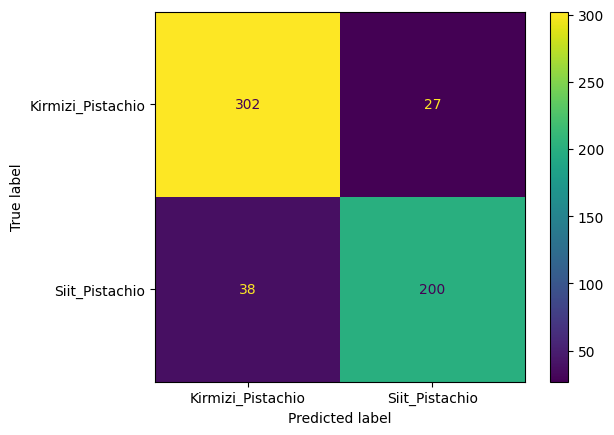

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, model_rfecv.predict(X_test), display_labels=['Kirmizi_Pistachio', 'Siit_Pistachio']);

Comparando as matrizes de confusão do Modelo 1 e Modelo 4:

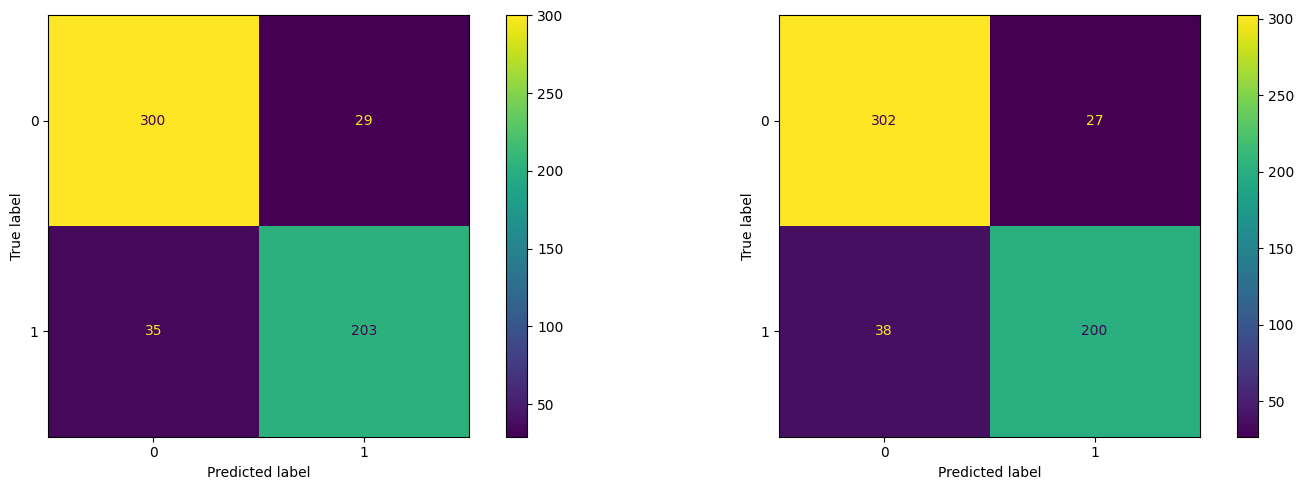

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), ax=ax1)
ConfusionMatrixDisplay.from_predictions(y_test, model_rfecv.predict(X_test), ax=ax2)
plt.tight_layout()
plt.show();

### Resultados

**Modelo 1** - Acurácia com todas as features: 0.8871252204585538

**Modelo 2** - Acurácia com as features selecionadas: 0.8483245149911817

**Modelo 3** - Acurácia com features selecionadas e melhores hiperparâmetros: 0.8571428571428571

**Modelo 4** - Acurácia com RFECV: 0.8853615520282186

A acurácia do Modelo 4 com o Modelo 1 se mostrou muito próxima, com a diferença acontecendo na terceira casa decimal. 

Pela matriz de confusão também é possível ver resultados bem próximos entre os Modelos 1 e 4, com o Modelo 1 indo ligeiramente melhor na identificação do Siit_Pistachio, e o Modelo 4 indo ligeiramente melhor na identificação do Kirmizi_Pistachio

Em termos de tempo de execução, o fit do Modelo 4 foi o maior de todos, com 44s.